In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
#from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Customer_Data (1).csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mahnazarjmand/customer-segmentation",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head(1))

/var/folders/xy/_8sy78y94s98hlr1n_08t5bm0000gn/T/ipykernel_18577/3382035080.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:   CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12  


## Exploratory Data Analysis

In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

#### The columns 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' have some null values. Imputing the missing values with the mean value of the column. 

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [13]:
#Dropping off Customer ID column because it is not relevant here
df.drop(columns=["CUST_ID"],axis=1, inplace=True)

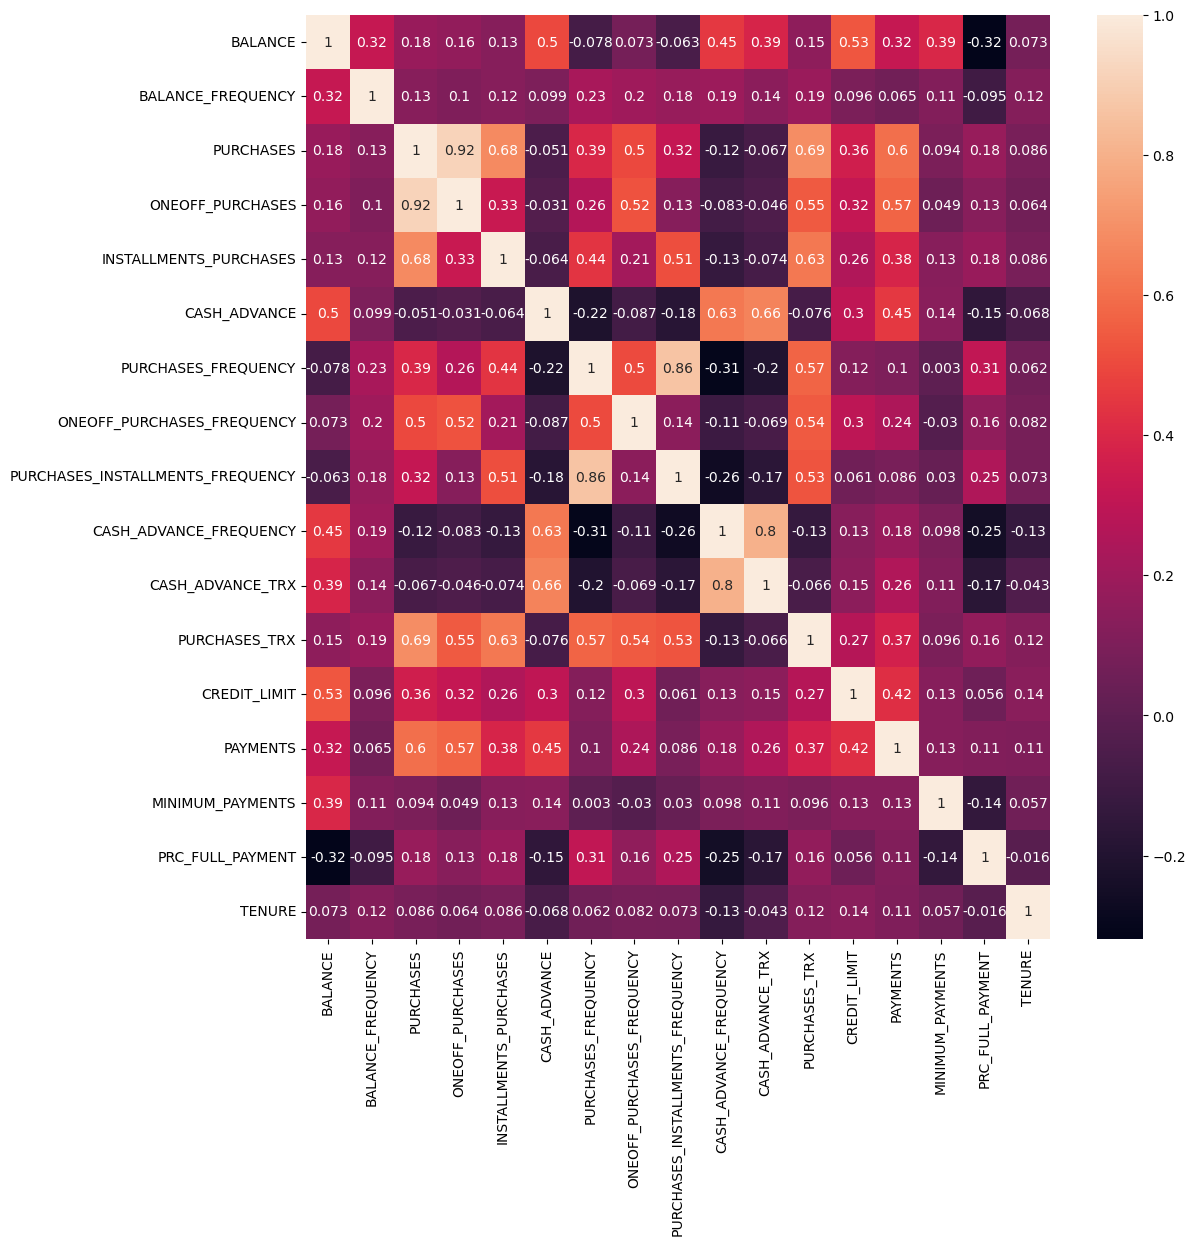

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Feature Scaling 

In [19]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

In [ ]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## Model Building using KMeans 

In [21]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)

array([1, 0, 3, ..., 3, 1, 1], dtype=int32)

In [22]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  4579.634667          0.968490   492.404081       313.228153   
1  1001.528209          0.788583   270.731977       209.468426   
2  3556.148177          0.986911  7680.432073      5099.738293   
3   897.456372          0.935846  1238.779285       595.851281   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             179.259744  4480.714056            0.284191   
1              61.530909   588.078522            0.171857   
2            2582.157195   686.680975            0.946548   
3             643.203117   211.260815            0.885991   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.136741                         0.183034   
1                   0.086346                         0.082117   
2                   0.739667                         0.788577   
3                   0.297970                         0.712244   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.482347        14.194559      7.539984  7505.733343   
1               0.113603         2.092420      2.923697  3270.170683   
2               0.073149         2.170732     89.309756  9711.097561   
3               0.042713         0.792610     22.133492  4217.363007   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3452.619411      1994.585998         0.034840  11.385820  
1   969.563615       583.818511         0.078372  11.444976  
2  7301.419079      1977.054411         0.286211  11.951220  
3  1334.890105       651.454148         0.269643  11.597437

In [24]:
# Creating a target column "Cluster" for storing the cluster segment for each record
cluster_df = pd.concat([df,pd.DataFrame({'CLUSTER':kmeans_model.labels_})], axis=1)
cluster_df


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        3  
3        0.000000        864.206542          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        3  
89

In [30]:
cluster_0_df = cluster_df[cluster_df["CLUSTER"]==0]
cluster_1_df = cluster_df[cluster_df["CLUSTER"]==1]
cluster_2_df = cluster_df[cluster_df["CLUSTER"]==2]
cluster_3_df = cluster_df[cluster_df["CLUSTER"]==3]

In [31]:
cluster_0_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     3202.467416           0.909091       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
23    3800.151377           0.818182    4248.35           3454.56   
24    5368.571219           1.000000       0.00              0.00   
28    7152.864372           1.000000     387.05            204.55   
...           ...                ...        ...               ...   
8857  2330.222764           1.000000    1320.00              0.00   
8858   812.934042           1.000000      50.00             50.00   
8869  2171.222526           1.000000     791.18            791.18   
8915   381.341657           1.000000      78.00              0.00   
8941  5967.475270           0.833333     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00   6442.945483             0.000000   
15                   1611.70   2301.491267             0.500000   
23                    793.79   7974.415626             1.000000   
24                      0.00    798.949863             0.000000   
28                    182.50   2236.145259             0.666667   
...                      ...           ...                  ...   
8857                 1320.00  14926.790590             0.428571   
8858                    0.00   2185.500596             0.142857   
8869                    0.00   2056.602480             0.428571   
8915                   78.00    934.808869             1.000000   
8941                  214.55   8555.409326             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.000000                          0.000000   
15                      0.000000                          0.500000   
23                      0.083333                          0.916667   
24                      0.000000                          0.000000   
28                      0.166667                          0.416667   
...                          ...                               ...   
8857                    0.000000                          0.285714   
8858                    0.142857                          0.000000   
8869                    0.428571                          0.000000   
8915                    0.000000                          0.833333   
8941                    0.000000                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.250000                 4              0        7000.0   
15                  0.166667                 4             11        8000.0   
23                  0.333333                13             13        9000.0   
24                  0.363636                 4              0        6000.0   
28                  0.833333                16              8       10500.0   
...                      ...               ...            ...           ...   
8857                0.571429                10              3       10000.0   
8858                1.000000                16              1        3000.0   
8869                0.571429                 6              8        3000.0   
8915                0.666667                16              6        1000.0   
8941                0.666667                13              5        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
1     4103.032597       1072.340217          0.222222      12        0  
15    1993.439277       2109.906490          0.000000      12        0  
23    9479.043842       1425.426525          0.000000      12        0  
24    1422.726707       1657.002877          0.000000      11        0  
28    1601.448347       1648.851345          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8857  8157.666434        283.362434          0.200000       7        0  
88

<AxesSubplot:xlabel='CLUSTER', ylabel='count'>

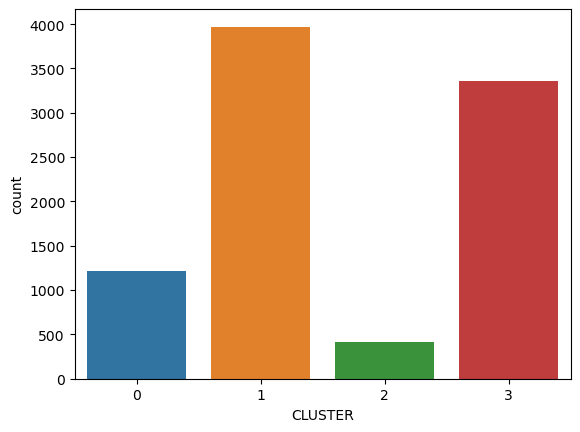

In [32]:
sns.countplot(x="CLUSTER", data=cluster_df)

### We are now going to turn this unsupervised learning problem to a supervised learning problem by treating the CLUSTER column value as the target variable, that our supervised learning model should predict.

## Decision Tree model 

In [34]:
#Split Dataset
X = cluster_df.drop(['CLUSTER'],axis=1)
y= cluster_df[['CLUSTER']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6265, 17), (2685, 17), (6265, 1), (2685, 1))

In [36]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 329   36    4   13]
 [  20 1173    0   26]
 [   0    0  114   17]
 [  10   33    6  904]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       382
           1       0.94      0.96      0.95      1219
           2       0.92      0.87      0.89       131
           3       0.94      0.95      0.95       953

    accuracy                           0.94      2685
   macro avg       0.93      0.91      0.92      2685
weighted avg       0.94      0.94      0.94      2685



In [43]:
print("Test Accuracy using Decision Tree: {}".format(model.score(X_test,y_test)))

Test Accuracy using Decision Tree: 0.9385474860335196
